In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import export_text

In [2]:
main_2020 = pd.read_csv('main_2020_all.csv')
print(main_2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            18408 non-null  int64  
 1   quarter                         18408 non-null  object 
 2   monthsigned                     18408 non-null  float64
 3   market                          18408 non-null  object 
 4   region                          18408 non-null  object 
 5   city                            18408 non-null  object 
 6   state                           18408 non-null  object 
 7   internal_submarket              18408 non-null  object 
 8   internal_class                  18408 non-null  object 
 9   leasedSF                        18408 non-null  float64
 10  internal_industry               18408 non-null  object 
 11  transaction_type                18408 non-null  object 
 12  space_type                      

In [14]:

# Start with your cleaned transaction dataset
df = main_2020.copy().drop(
    ["internal_submarket", "CBD_suburban", "region", "market", "state","direct_available_space", "direct_availability_proportion","direct_internal_class_rent","direct_overall_rent","sublet_available_space","sublet_availability_proportion","sublet_internal_class_rent","sublet_overall_rent"], axis=1
)

# Define target and features
target = "city"  # or 'market', 'region', etc.
X = df.drop(columns=[target])
y = df[target]

# Encode categorical features
encoders = {}
for col in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

# Encode the target (city)
city_encoder = LabelEncoder()
y_encoded = city_encoder.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Optional: check accuracy
print("Model accuracy:", clf.score(X_test, y_test))

Model accuracy: 0.9244975556762629


In [15]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# # Let's pick the first tree from the forest
# single_tree = clf.estimators_[0]

# plt.figure(figsize=(20, 10))  # Adjust size as needed
# plot_tree(
#     single_tree,
#     feature_names=X.columns,  # or your feature name list
#     filled=True,
#     rounded=True,
#     # Hide class distribution and sample counts:
#     label='none',
#     # Hide impurity (e.g., Gini or entropy):
#     impurity=False,
#     proportion=False
# )
# plt.title("Visualization of One Tree from the Random Forest")
# plt.show()


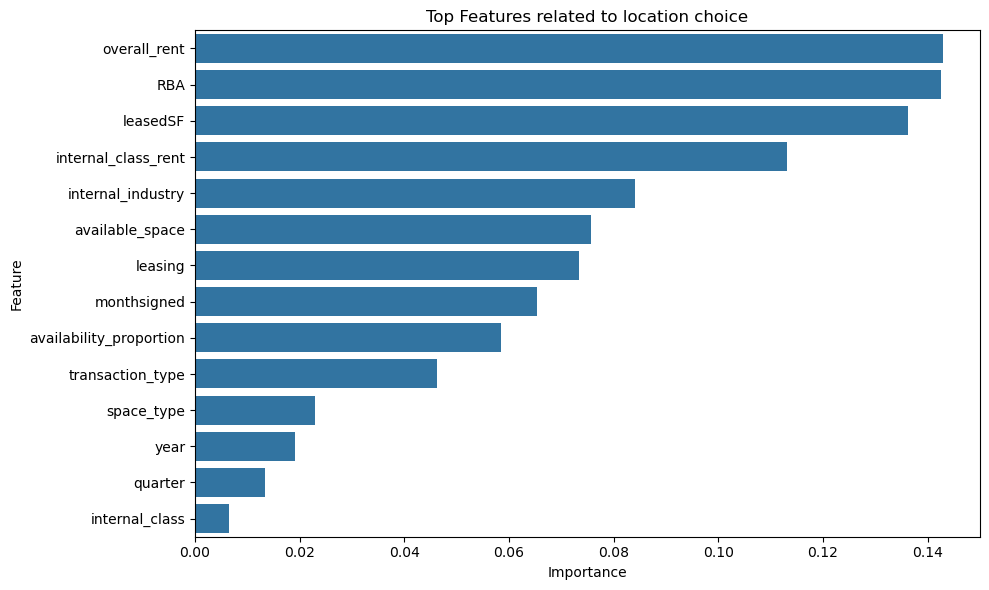

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the feature importances
importances = clf.feature_importances_

# Create a DataFrame with feature names and their importances
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot the top 15 features (or all if you prefer)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15))
plt.title('Top Features related to Leasing Option')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import export_text
from sklearn.tree import export_graphviz


tree = clf.estimators_[0]


export_graphviz(
    tree,
    out_file="tree.dot",  # output file path
    feature_names=X.columns.tolist(),  # list of features
    class_names=city_encoder.classes_,  # original target class labels
    filled=True,      # fill nodes with color
    rounded=True,     # round the boxes
    special_characters=True,  # for better formatting
    label="none",      # Hides all labels in nodes (including "value")
    impurity=False,
    proportion=True
)



In [25]:
from sklearn.tree import export_text

# Generate the tree text
tree_text = export_text(tree, feature_names=X.columns.tolist())

# Write the text to a Markdown file with a code block
with open('decision_tree.md', 'w') as md_file:
    md_file.write("```plaintext\n")
    md_file.write(tree_text)
    md_file.write("\n```")
